# Ejercicios prácticos

## Regresión lineal

En un problema de regresión lineal intentamos buscar la recta $y=mx+b$ que mejor se adapte a unos puntos o muestras ($X$ e $Y$). Esto lo hacemos minimizando una función de error $E$ que definimos como el sumatorio del cuadrado de la distancia entre el valor ($y$) real de la muestra y el dado por la recta ($mx+b$).

$$ E = \sum_{i=1}^{m}{(mX + b - Y)^2} $$

Si buscamos el mínimo de esta función mediante el método de descenso por el gradiente, deberemos calcular la derivada parcial de cada parámetro ($m$ y $b$) implicado en la función de la recta.

$$ \frac{\partial E}{\partial m} =  \sum_{i=1}^{m}{2(mX + b - Y)X } $$

$$ \frac{\partial E}{\partial b} =  \sum_{i=1}^{m}{2(mX + b - Y) } $$

De esta forma, actualizamos los parámetros $m$ y $b$ de la siguiente forma:

$$m \leftarrow m - \lambda \frac{\partial E}{\partial m}$$

$$b \leftarrow b - \lambda \frac{\partial E}{\partial b}$$

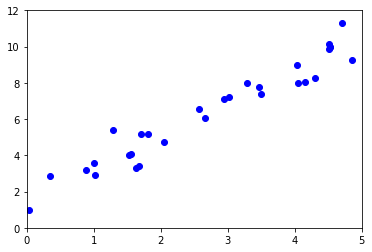

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numberOfSamples = 30

mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, numberOfSamples)

x= np.random.rand(numberOfSamples)*5
y = 2*x + 1 + noise
 
plt.axis([0, 5, 0, 12])
plt.plot(x,y,'bo')
plt.show()

### Tarea

Desarrolla el código necesario para calcular los parámetros $m$ y $b$.


--------------------------

Los valores obtenidos son: 8.331231454384138 -18.720236329430282 en pasos 99


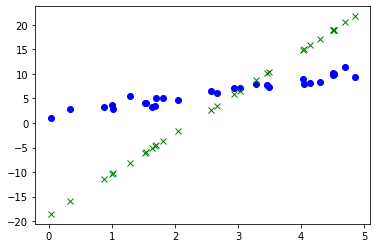

In [13]:
import numpy as np
# Definición de los ajustes y parámetros iniciales
num_steps = 100 #DEfinimos numero iteraciones
lrate = 0.05 #Parametro de aprendizaje
error= 0.01 #error para criterio de parada
m = 2
b = 1

for step in range(0, num_steps):
    m_gradient = 0#Valores de inicio
    b_gradient = 0
    N = float(len(x))
    for i in range(0, len(x)): 
        #Esto es como si hiciese la SUMA
        m_gradient=m_gradient - (2/N) * (y[i] - (b + m* x[i]))#dE/dm
        b_gradient=b_gradient - (2/N) * (y[i] - (b + m * x[i])) * x[i]#dE/db
        
    m = m - (lrate * m_gradient)
    b = b - (lrate * b_gradient)
    if max(abs(lrate * m_gradient), abs(lrate * b_gradient)) < error: #criterio de parada
        break
    

print("Los valores obtenidos son:", m, b, "en pasos", step)

y1=m*x+b
plt.plot(x,y,'bo')
plt.plot(x,y1,'xg')


In [35]:
b

-0.8429228667338136

## Indexación TF-IDF

**TF-IDF** es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección. Esta medida se utiliza a menudo como un factor de ponderación en la recuperación de información y la minería de texto. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

In [6]:
import fnmatch
import os


def doc_reader(file_name):
    with open(file_name) as f:
        text = f.read().decode('utf8')
    return text


def docs_generator(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, '*.txt'):
            yield(os.path.join(root, filename))
            
for doc in docs_generator("articles"):
    print(doc)
    


### Tarea

Desarrolla una indexador TF-IDF.

## Web scrapping

Web scraping es una técnica utilizada mediante programas de software para extraer información de sitios web. Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

El web scraping está muy relacionado con la indexación de la web, la cual indexa la información de la web utilizando un robot y es una técnica universal adoptada por la mayoría de los motores de búsqueda.

In [7]:
import requests
from bs4 import BeautifulSoup


def getPrice(url):
    
    headers = {
        'User-Agent': 'Mozilla/5.0'
    }

    # open with GET method
    resp = requests.get(url, headers=headers)

    # http_respone 200 means OK status
    if resp.status_code == 200:
        soup = BeautifulSoup(resp.text, 'html.parser')        
        price = soup.find(id="priceblock_ourprice").text        
        return price
    else:
        print("Error")


print(getPrice("https://www.amazon.es/Computer-Age-Statistical-Inference-Student/dp/1108823416/ref=pd_lpo_1?pd_rd_i=1108823416&psc=1")

SyntaxError: unexpected EOF while parsing (<ipython-input-7-d3cfc1eb8cfa>, line 23)

### Tarea

Desarrolla un código para que monitorice el precio de varios artículos de una tienda durante un periodo de tiempo. Puedes parametrizar la frecuencia de muestreo como consideres.